In [1]:
# Assignment 3 Part 2 Trajectory 2
# Relationship between solar radio flux F10.7 and sunspot number
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Yaroslav Okunev
#     Nikita Mikhailovskiy
#
# Skoltech, 04.10.2019

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
#4 second trajectory
#initial acceleration
A1 = 1
#N. of points
C = 200
#Period counts
T = 32
#Variance
sw = 0.08
s2w = sw**2

#noise
w = np.random.normal(0,sw,C)
#Angle frequency
afreq = 2*np.pi/T

#determine acceleration
A = np.zeros(C)
A[0] = A1
for i in range (1,C):
    A[i] = A[i-1] + w[i]

X = np.zeros(C)
for i in range (C):
    X[i] = A[i]*np.sin(afreq*i+3)

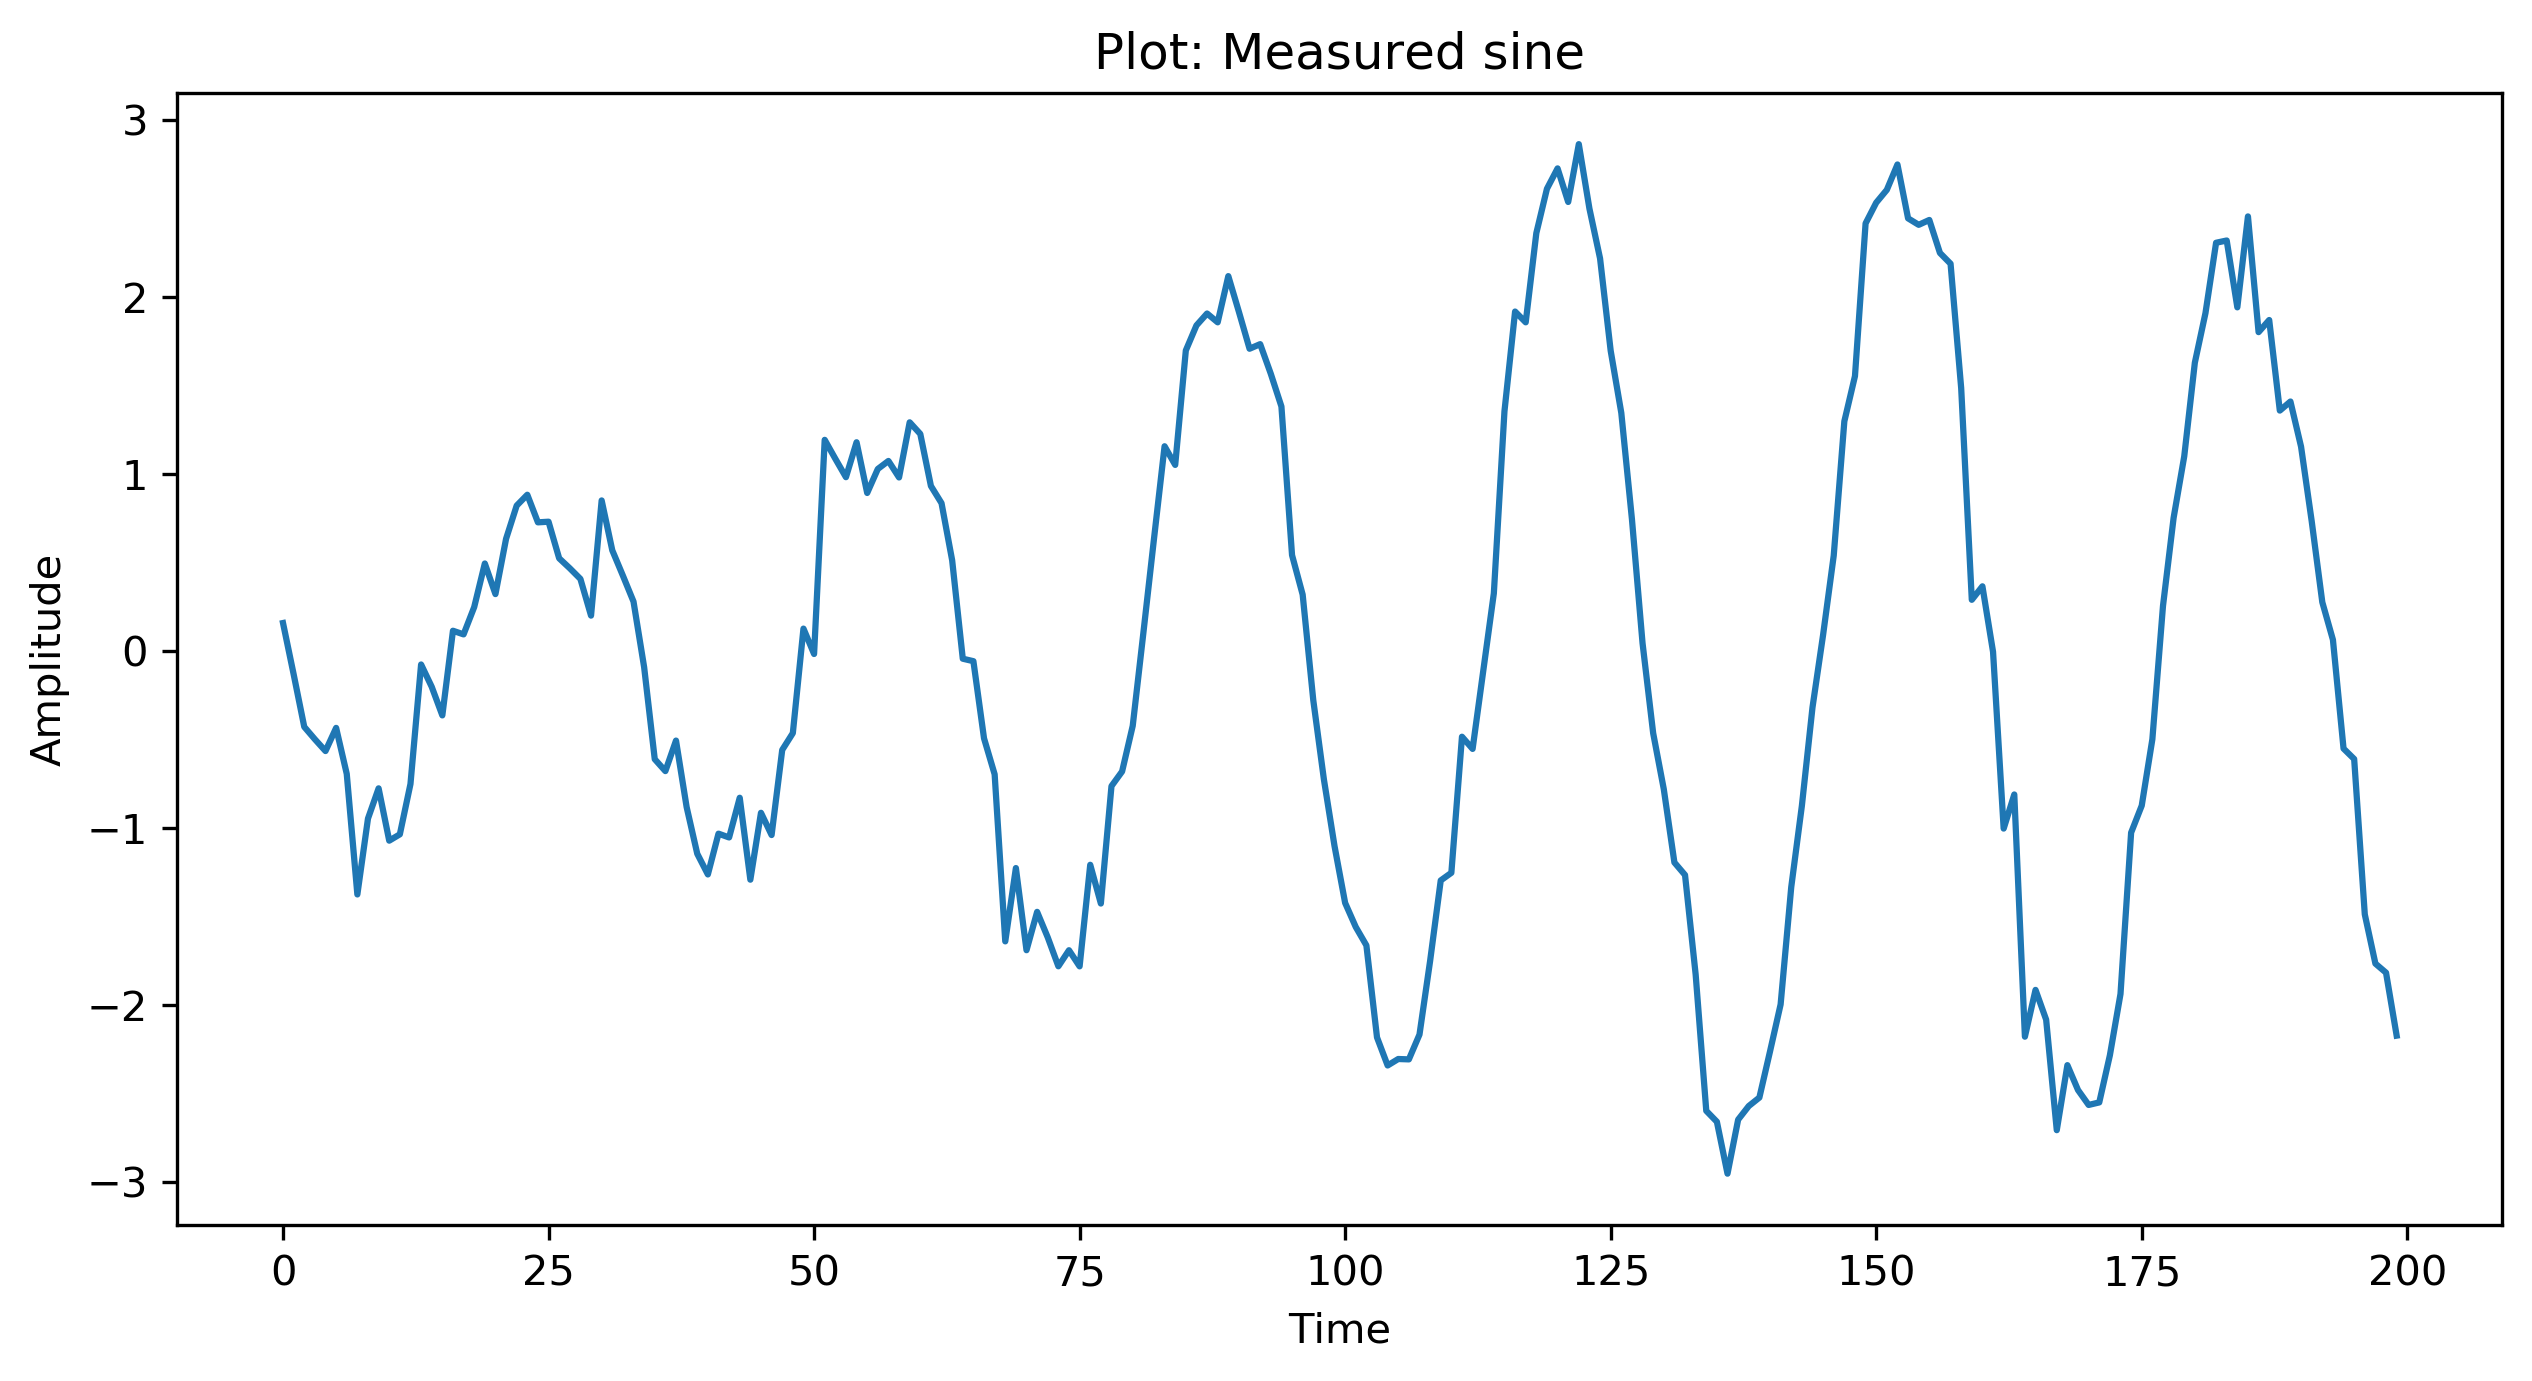

In [4]:
#5 Generating measurments
#Variance
s2n = 0.05
sn = np.sqrt(s2n)
Z = np.zeros(C)
n = np.random.normal(0,sn,C)

#determine measurment
for i in range (C):
    Z[i] = X[i] + n[i]

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Measured sine')    
plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show() 

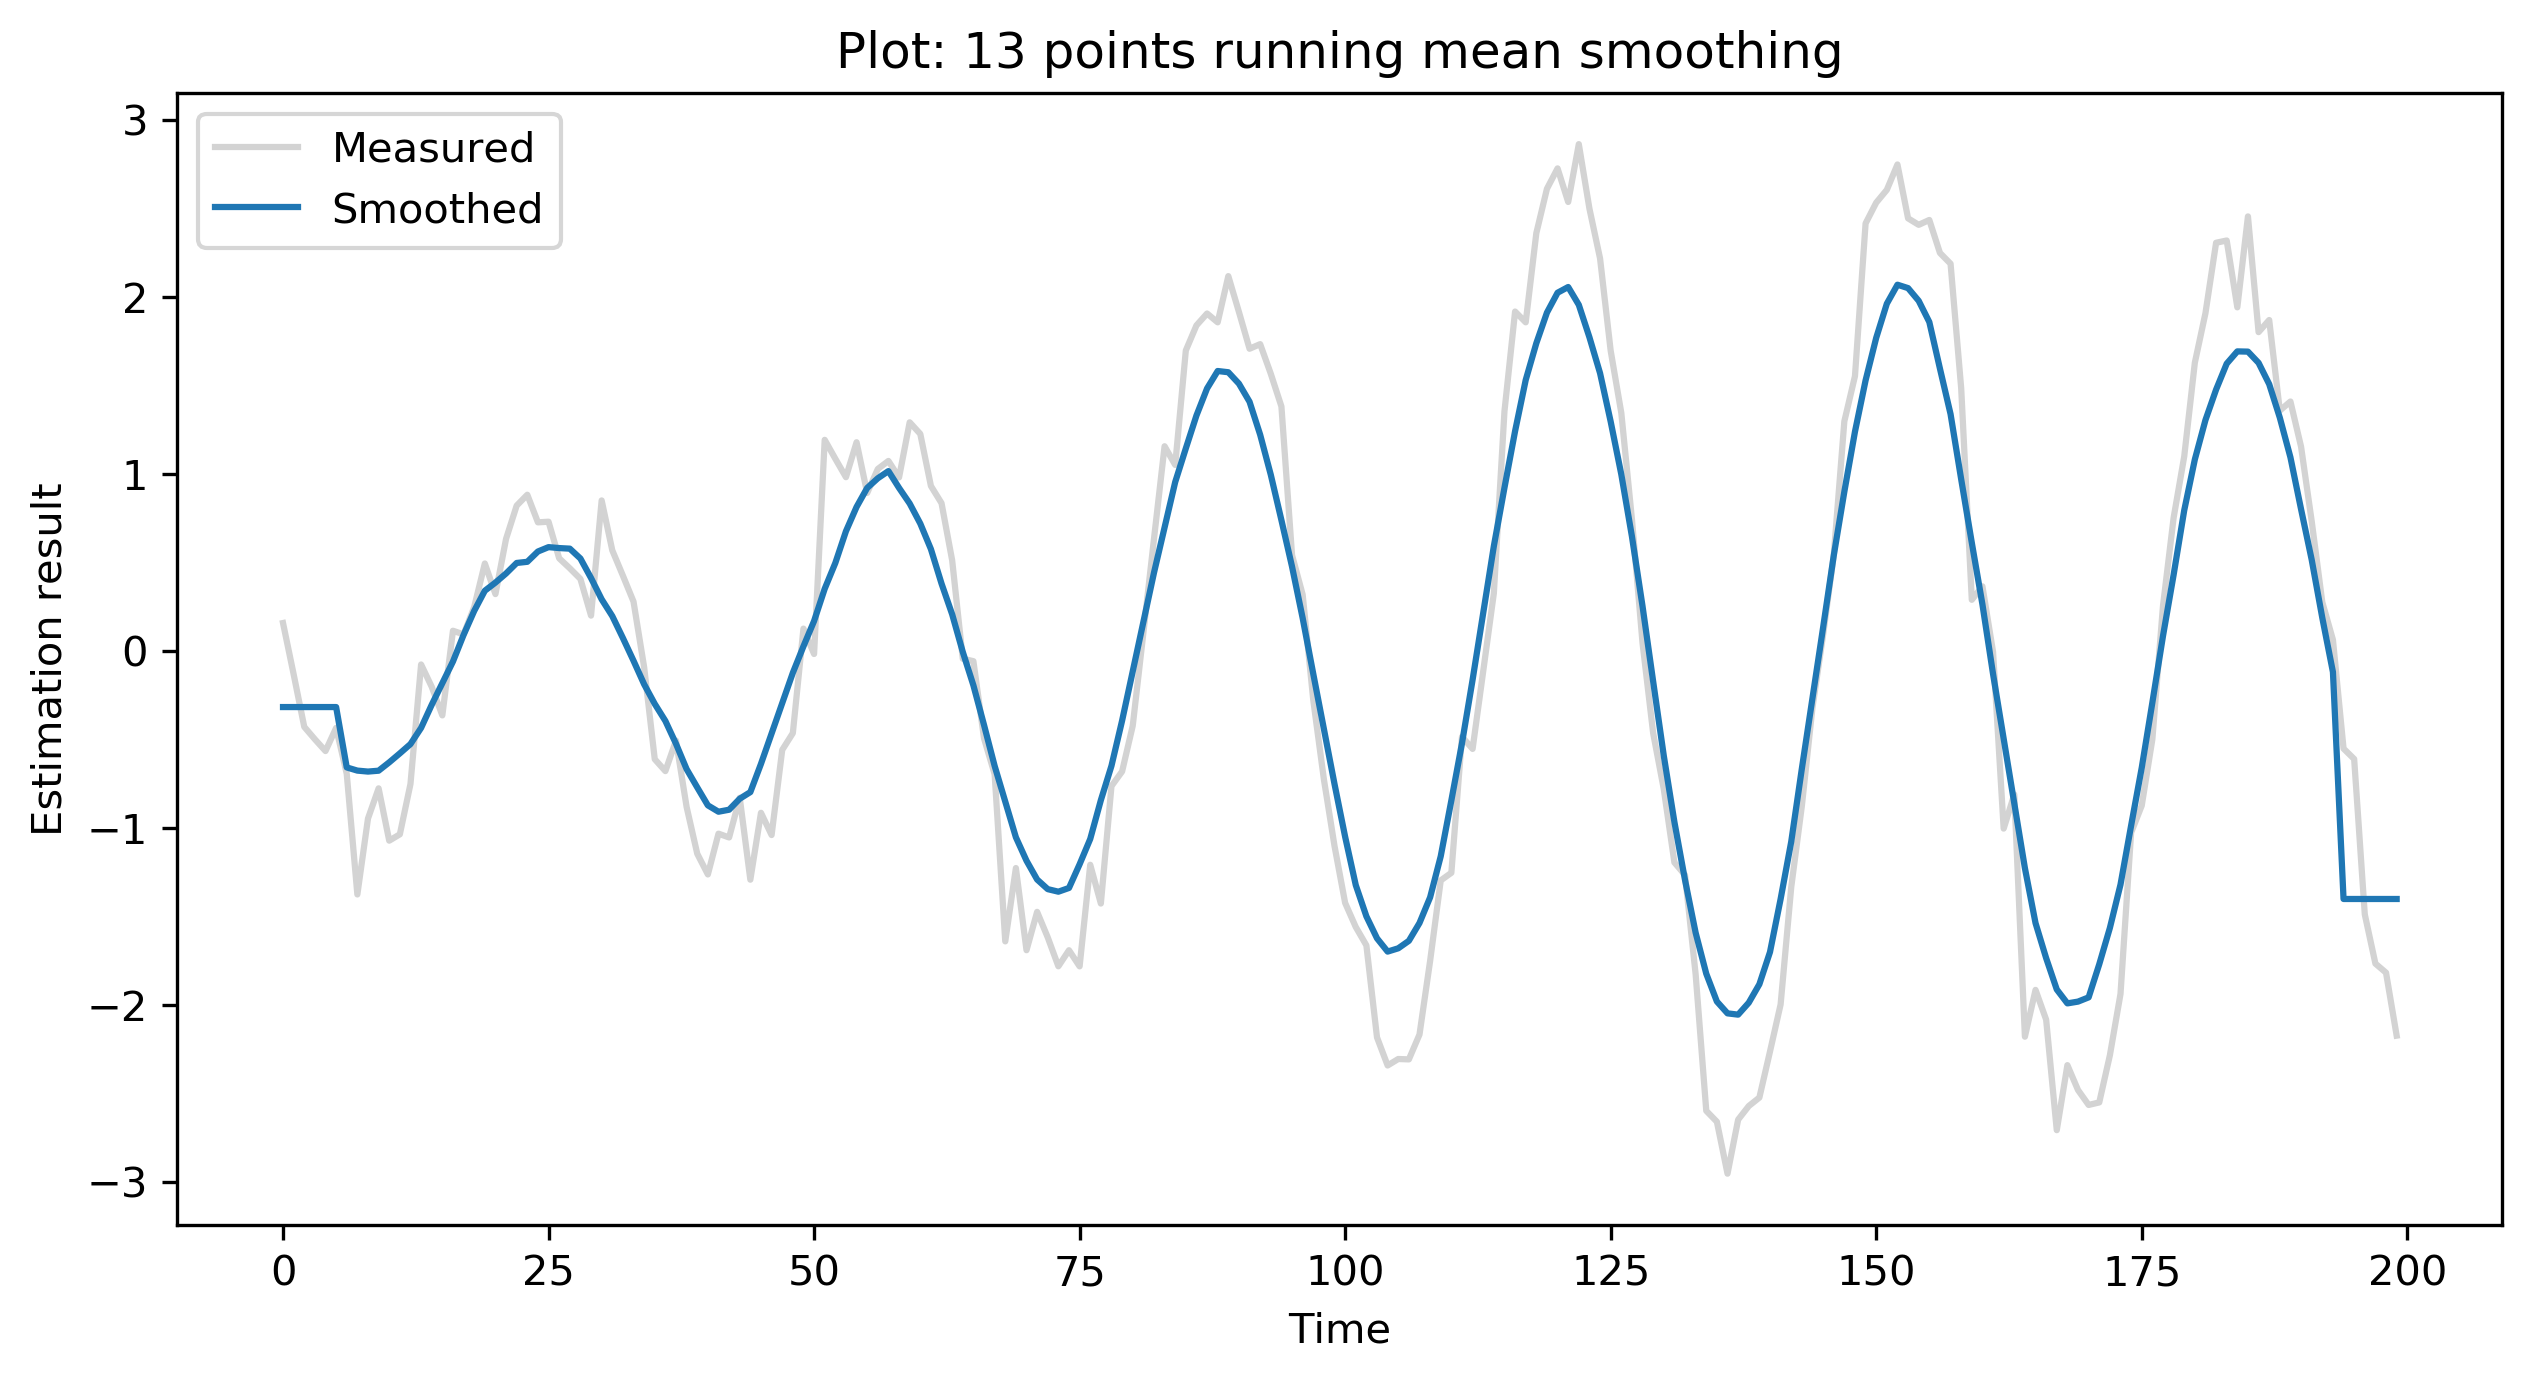

In [5]:
#6 Running mean
def rm(array, m):
    length = array.size
    smooth_arr = np.empty([length])
    diff = int((m-1)/2)
    
    #Pre-calculation: mean of the first six entries in dataset
    mean_first = 0
    for i in range (diff):
        mean_first += array[i]
    mean_first /= diff

    #Pre-calculation: mean of the last six entries in dataset
    mean_last = 0
    for i in range (diff):
        mean_last += array[length - i - 1]
    mean_last /= diff 
    
    #Calculation for smoothing data in array including M period points
    for i in range (0,length):
        if i < diff:
            smooth_arr[i] = mean_first
        elif i > (length - diff-1):
            smooth_arr[i] = mean_last
        else:
            sum_it = 0
            for n in range (m):
                it = n - diff
                sum_it += 1/m*array[i-it]
            smooth_arr[i] = sum_it
    return smooth_arr

sm_z = rm(Z,13)

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: 13 points running mean smoothing')    
plt.plot(Z, label='Measured', c='lightgrey')
plt.plot(sm_z, label='Smoothed')
plt.xlabel('Time')
plt.ylabel('Estimation result')
plt.legend()
plt.show() 

In [6]:
#7 Period of oscillation
M = 17

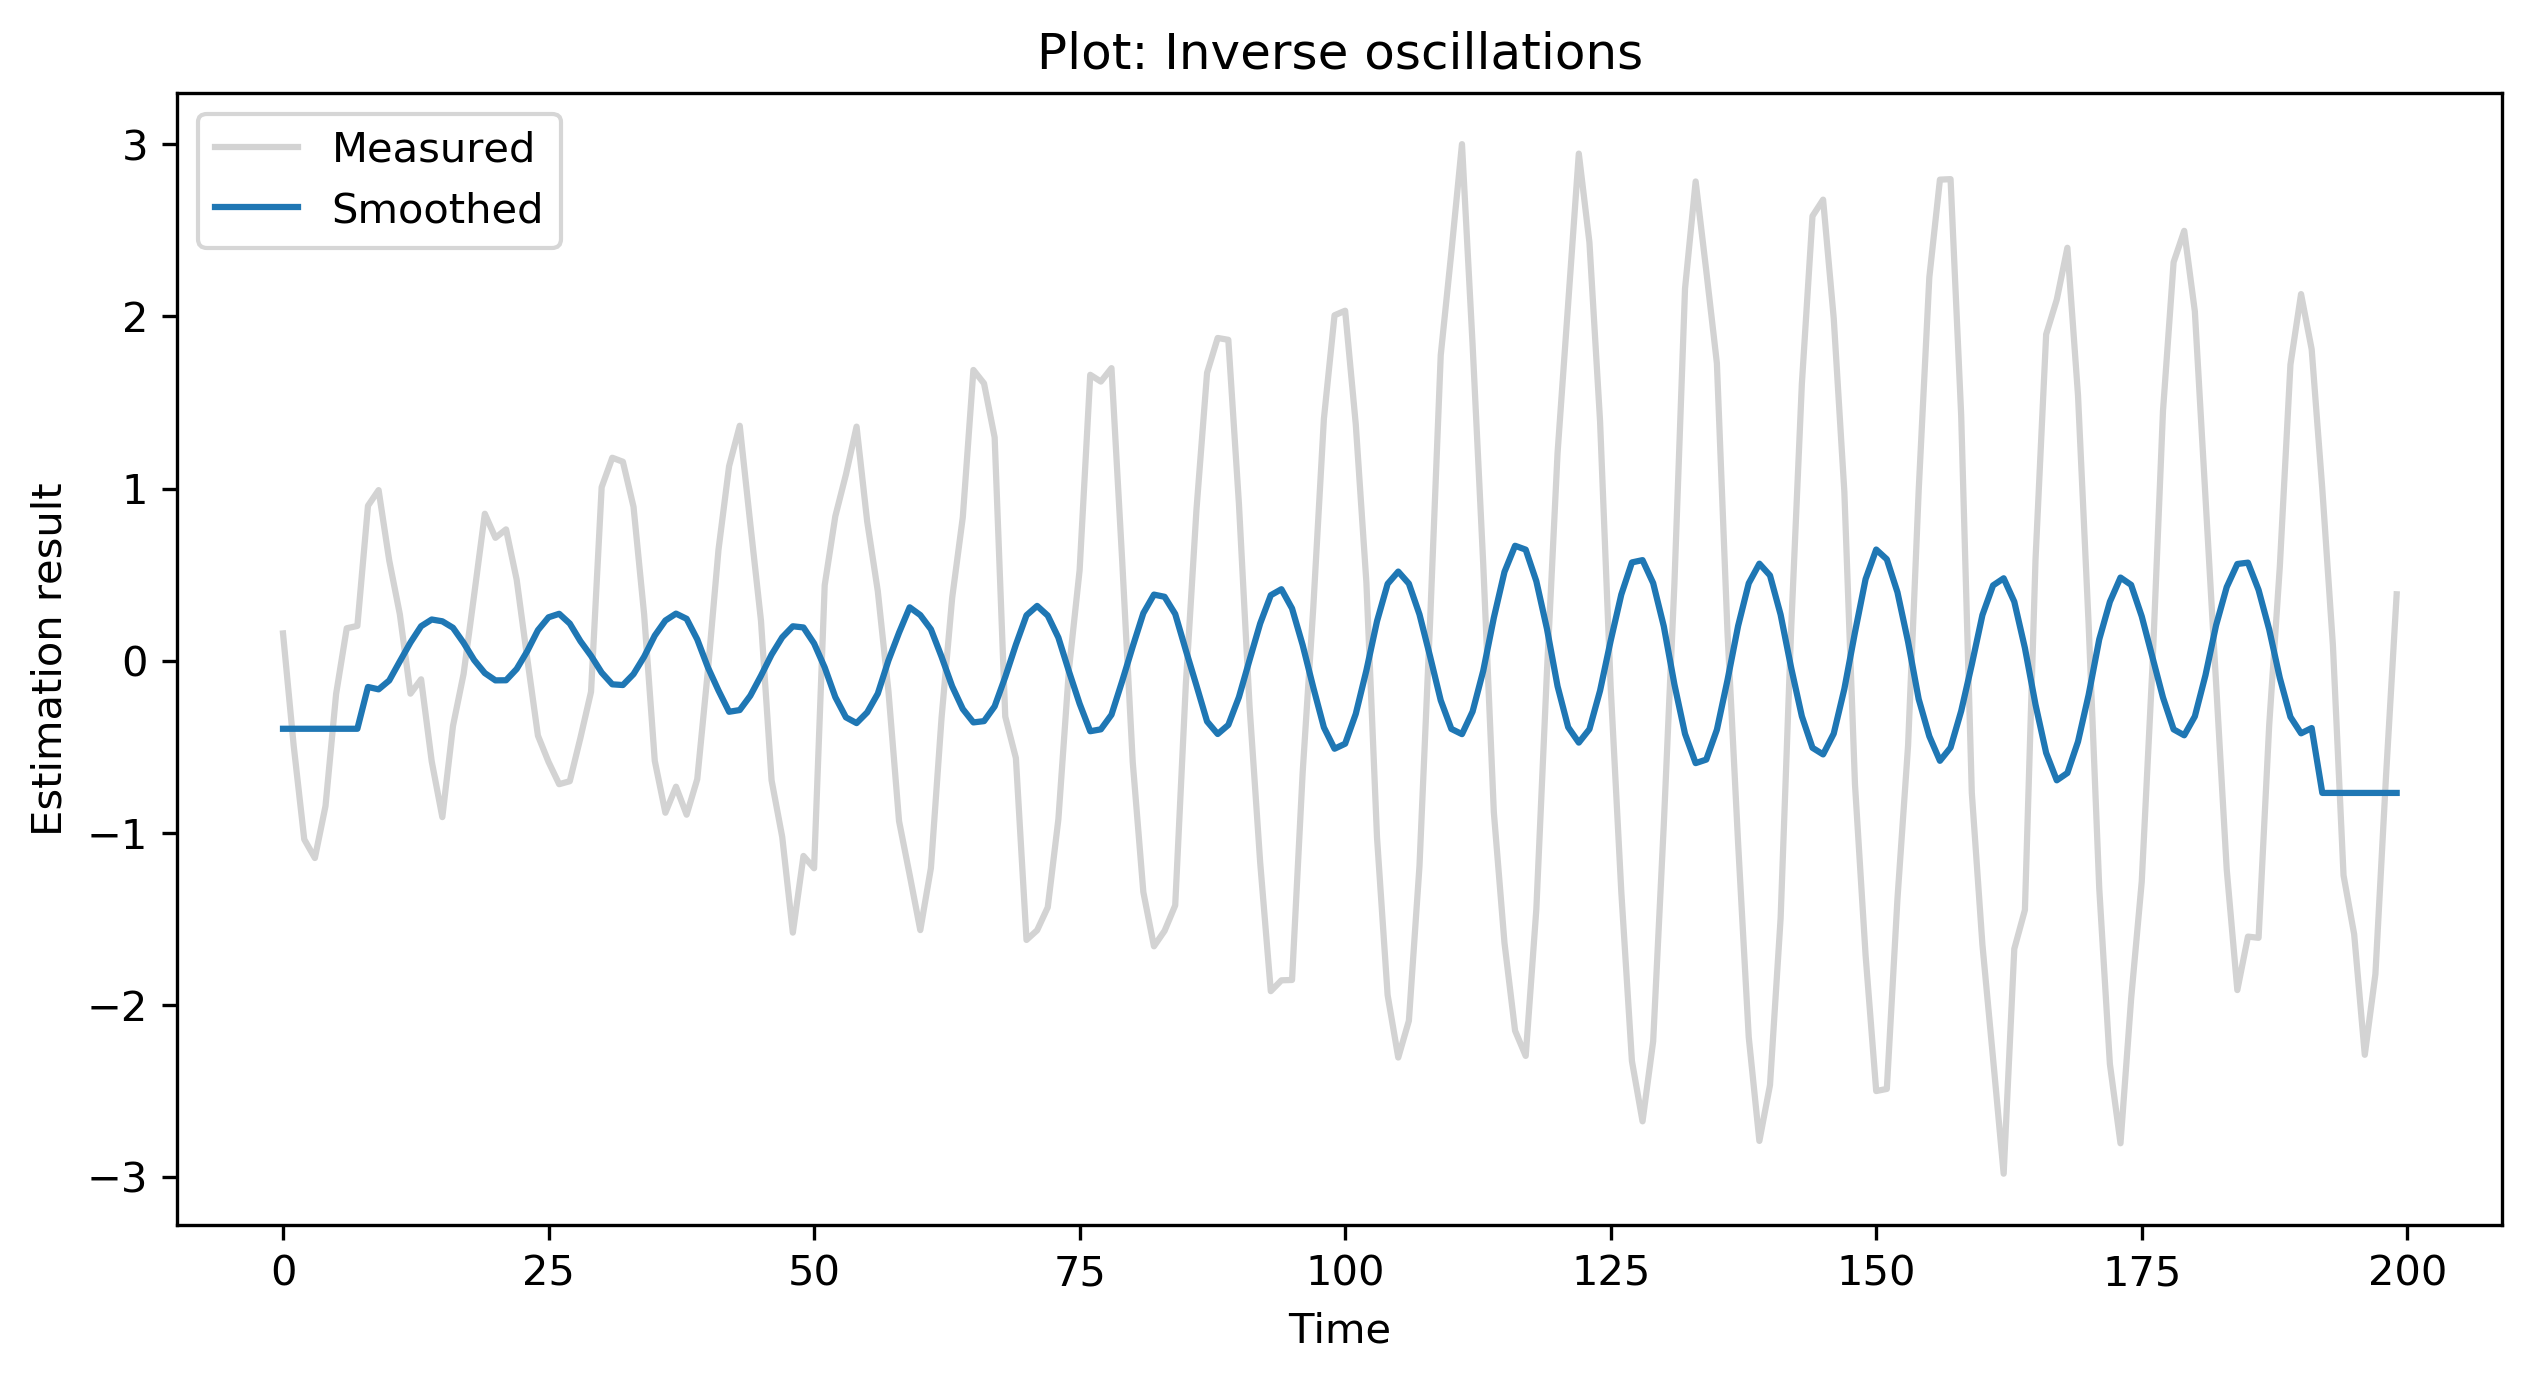

In [7]:
#a 1.5*M
afreq_a = 2*1.5*np.pi/M
#b M
afreq_b = 2*np.pi/M
#c < 0.5M
afreq_c = 2*0.4*np.pi/M

#a
Xa = np.zeros(C)
for i in range (C):
    Xa[i] = A[i]*np.sin(afreq_a*i+3)
#determine measurment
Za = np.zeros(C)
for i in range (C):
    Za[i] = Xa[i] + n[i]

sm_za = rm(Za,M)

figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Inverse oscillations')    
plt.plot(Za, label='Measured', c='lightgrey')
plt.plot(sm_za, label='Smoothed')
plt.xlabel('Time')
plt.ylabel('Estimation result')
plt.legend()
plt.show() 

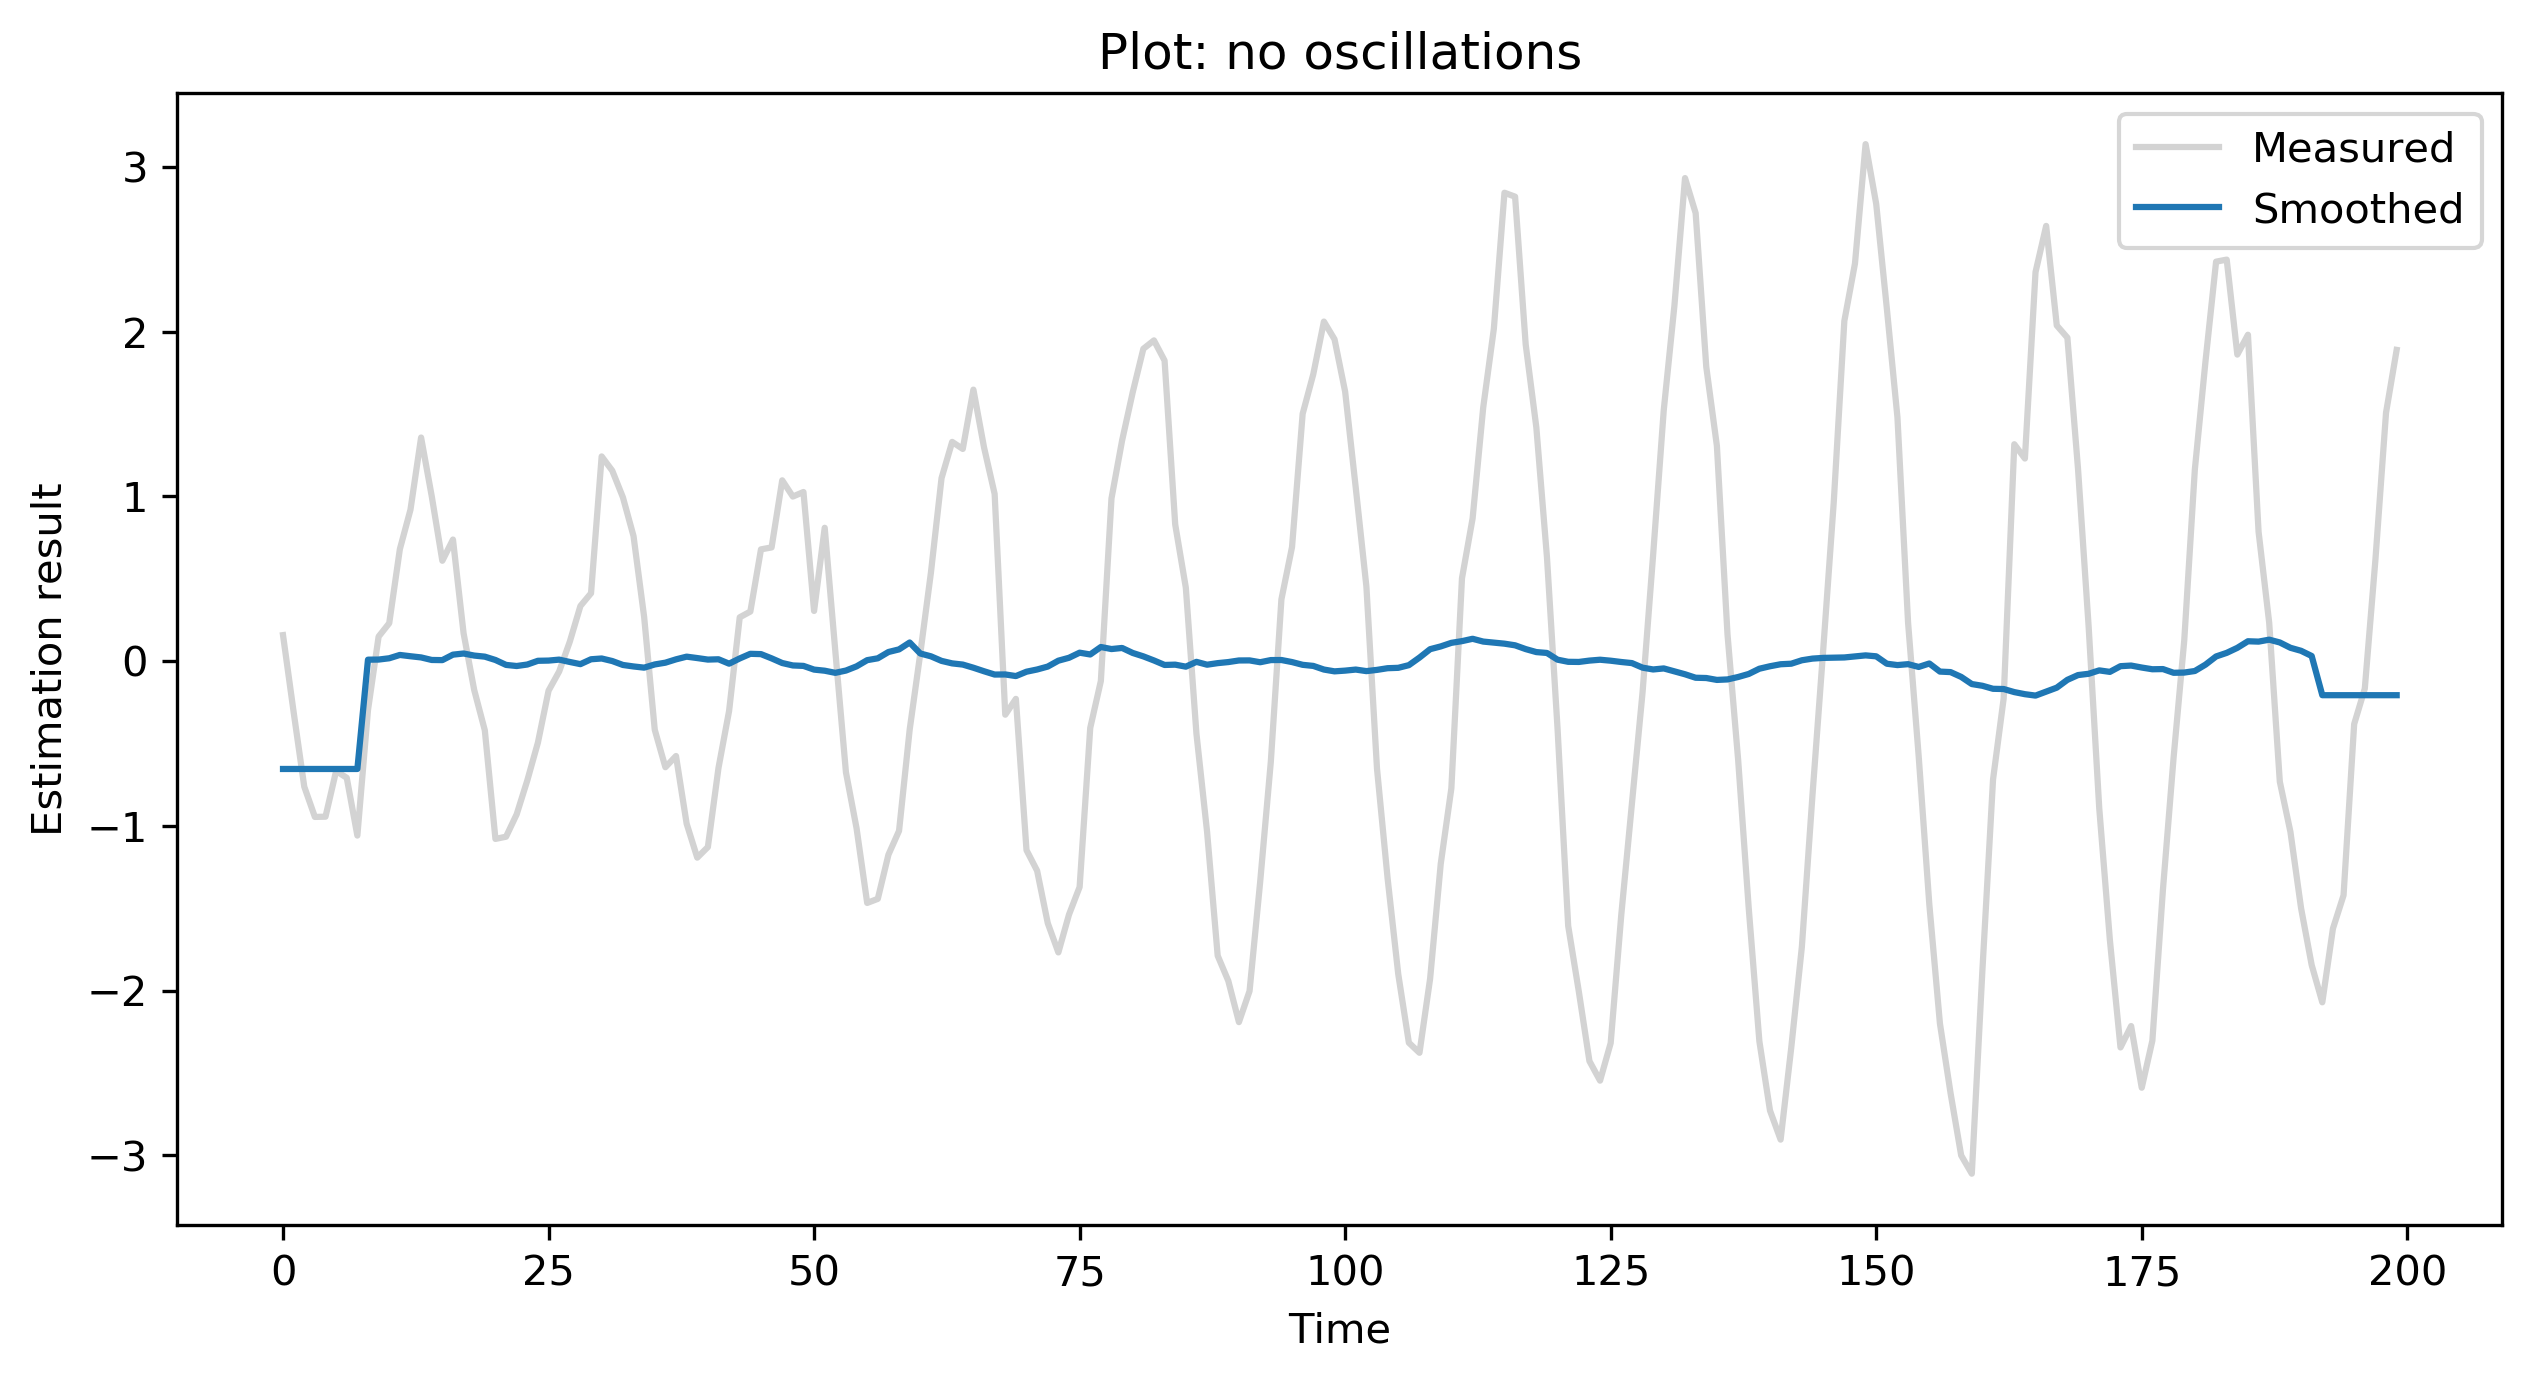

In [8]:
#b
Xb = np.zeros(C)
for i in range (C):
    Xb[i] = A[i]*np.sin(afreq_b*i+3)
#determine measurment
Zb = np.zeros(C)
for i in range (C):
    Zb[i] = Xb[i] + n[i]
    
sm_zb = rm(Zb,M)
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: no oscillations')    
plt.plot(Zb, label='Measured', c='lightgrey')
plt.plot(sm_zb, label='Smoothed')
plt.xlabel('Time')
plt.ylabel('Estimation result')
plt.legend()
plt.show() 

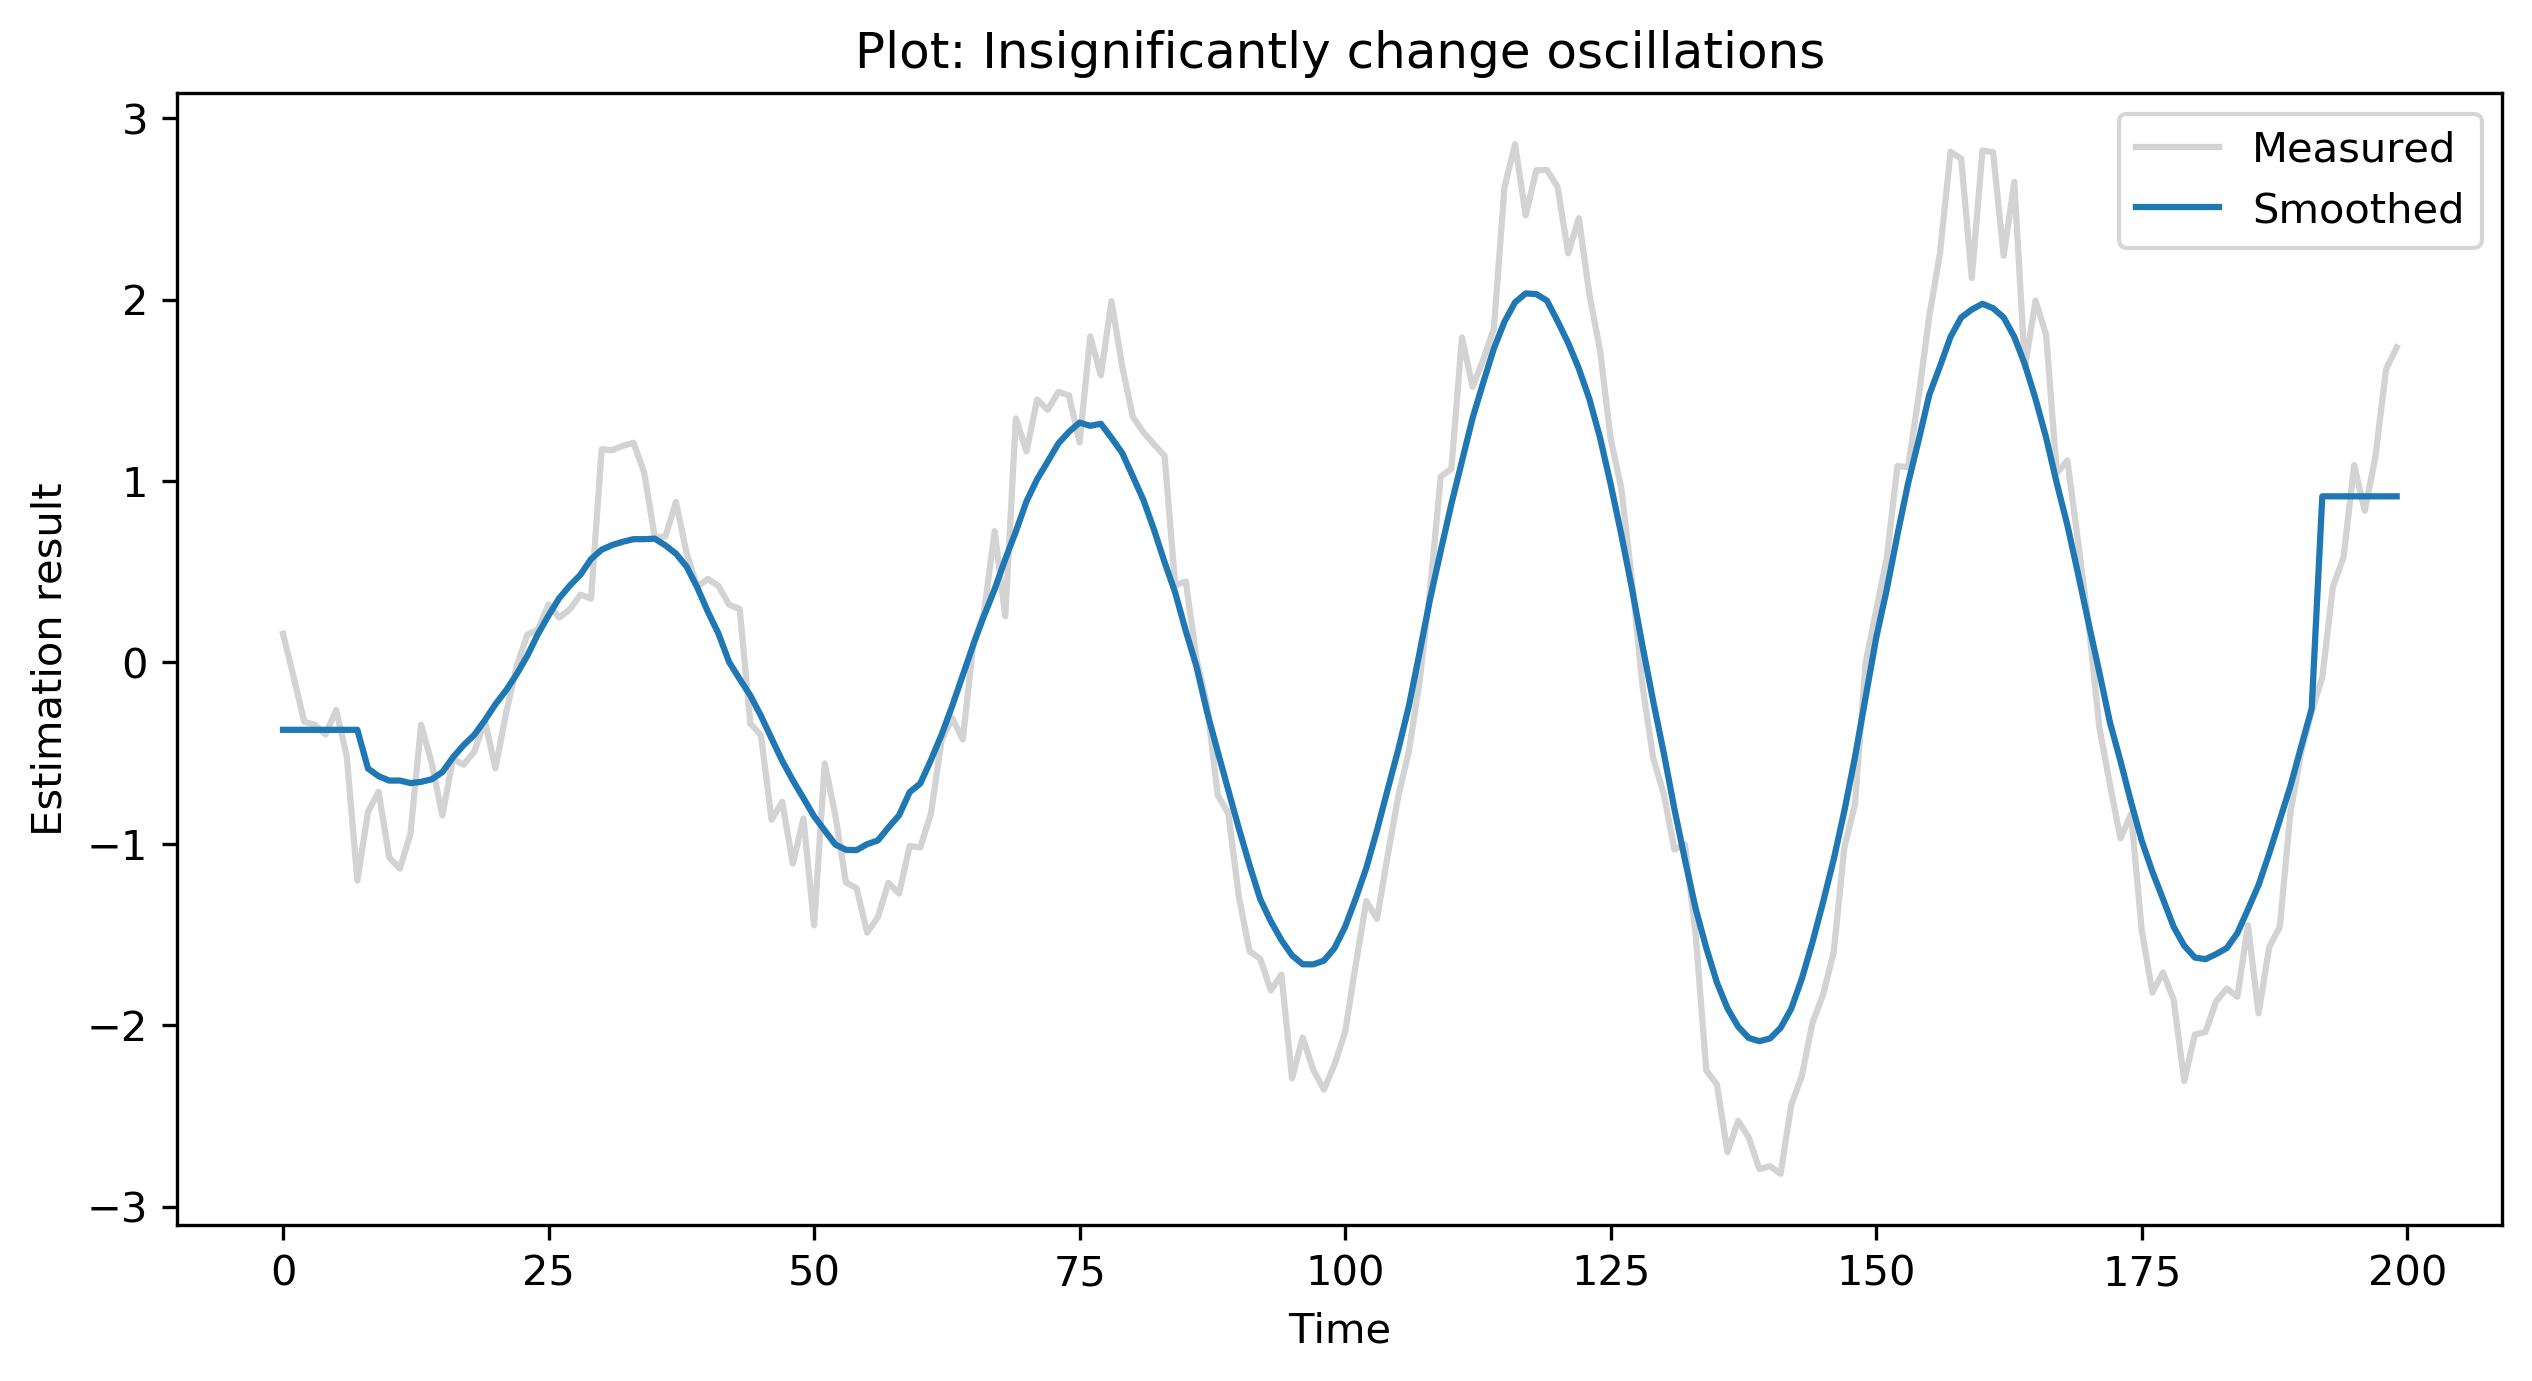

In [9]:
#c
Xc = np.zeros(C)
for i in range (C):
    Xc[i] = A[i]*np.sin(afreq_c*i+3)
#determine measurment
Zc = np.zeros(C)
for i in range (C):
    Zc[i] = Xc[i] + n[i]
    
sm_zc = rm(Zc,M)
    
figure(num=None, figsize=(10, 5), dpi=300, facecolor='w', edgecolor='k')
plt.title('Plot: Insignificantly change oscillations')    
plt.plot(Zc, label='Measured', c='lightgrey')
plt.plot(sm_zc, label='Smoothed')
plt.xlabel('Time')
plt.ylabel('Estimation result')
plt.legend()
plt.show() 